# 範例
根據以下的參考點，嘗試做透視變換

    point1 = np.array([[60, 40], [420, 40], [420, 510], [60, 510]], dtype=np.float32)
    point2 = np.array([[0, 80], [w, 120], [w, 430], [0, 470]], dtype=np.float32)

In [1]:
import cv2
import numpy as np

img = cv2.imread('picture/lena.png')

# 透視轉換

In [2]:
img_perspective = img.copy()
h,w = img.shape[:2]

# 設定四隊點，並取得perspective矩陣
point1 = np.array([[60,40],[420,40],[420,510],[60,510]],dtype=np.float32)
point2 = np.array([[0,80],[w,120],[w,430],[0,470]],dtype=np.float32)
M = cv2.getPerspectiveTransform(point1,point2)

# perspective轉換
img_perspective = cv2.warpPerspective(img,M,(w,h))

#組合+顯示圖片
img_show = np.hstack((img,img_perspective))
while True:
    cv2.imshow('perspective transform',img_show)
    k = cv2.waitKey(0)
    if k==27:
        cv2.destroyAllWindows()
        break

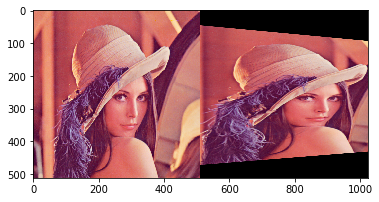

In [4]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 齊次座標(homogeneous coordinate)的概念

簡單來說，其次座標就是將n維的座標用n+1維的方式表示
$$
\begin{bmatrix}L & L &T\\L & L &T\\P & P &i\end{bmatrix}
\begin{bmatrix}xyw=1\end{bmatrix}=
\begin{bmatrix}x'y'w'\end{bmatrix}
$$
$$
X_{new}=\frac{x'}{w'} , 
Y_{new}=\frac{y'}{w'}
$$

    L is for linear transformation
    
    T is for translation transformation(共線不變性 and 比例不變性)
    
    P is for perspective transformation (invariant doesn't exist)
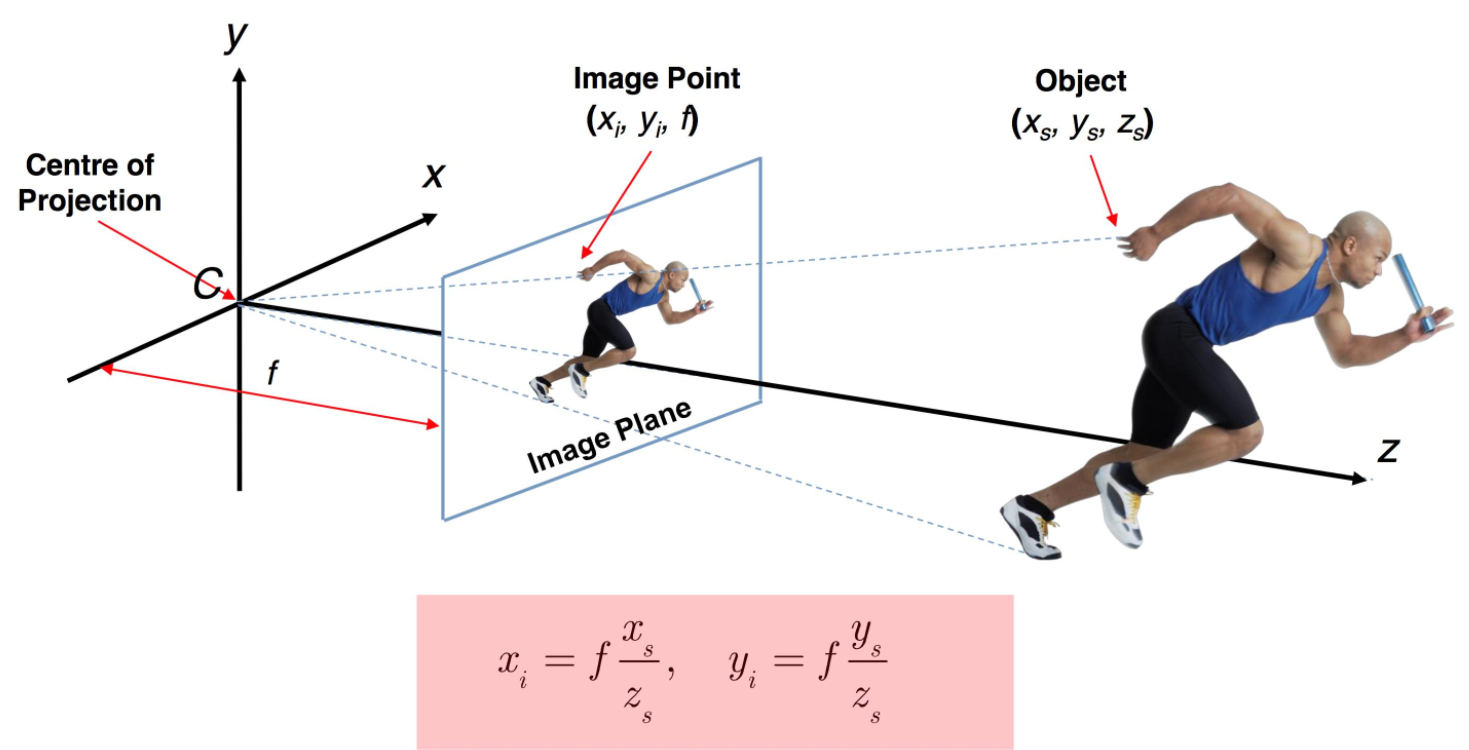